# 1 - Introduction

Name : Huesca Rashad Nadiputra

Batch : FTDS-016-RMT

Dataset : USA Housing

Objective : Make a regression model to do predict house price based on area characteristics.

Assumptions:
- People with higher income tend to have houses with higher prices.
- Newly built houses is more expensive than the older houses.
- Houses with more rooms or bedrooms would be bigger and therefore more expensive.
- Exclusive area which meant less populated ones tend to have a higher land price therefore higher price in housing aswell.
- People with higher income tend to have bigger houses therefore more rooms.

# 2 - Import Libraries

We will use the following libraries for this task.

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import joblib
import json

# 3 - Data Loading

First we are going to load the dataset that we will use using pd.read_csv.

In [2]:
# Load Dataset

raw = pd.read_csv('USA_Housing.csv')
raw

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


Before we do anything else to our dataset, it is better that we duplicate it first.

In [3]:
# Duplicate Dataset

df = raw.copy()

We can see the top and bottom datas of this dataset using .head and .tail.

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


We can also check a quick summary of our dataset using .info().

In [6]:
# Check Dataset - 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


From the information we can see that there are no null-value and all datatypes are correct, but we will change the column name to shorten them.

In [7]:
cols = {'Avg. Area Income': 'Income',
        'Avg. Area House Age': 'Age',
        'Avg. Area Number of Rooms': 'Rooms',
        'Avg. Area Number of Bedrooms': 'Bedrooms',
        'Area Population': 'Population'}

df.rename(columns=cols, inplace=True)

We could also use .describe() to check our dataset further.

In [8]:
# Check Dataset - 2

df.describe()

,Income,Age,Rooms,Bedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


We can see that there are no negative value herem so we could assume that our data is safe for now.

# 4 - Exploratory Data Analysis (EDA)

In [9]:
df

,Income,Age,Rooms,Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


Now we will do more exploration about all the feature of our datasets.

## 4.1 - Area Income

The first feature is the average income in the area, we will see whether area with higher income have more expensive houses or not.

<AxesSubplot: xlabel='Income', ylabel='Price'>

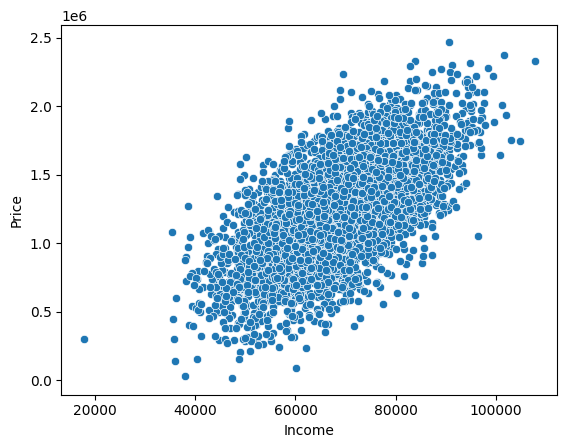

In [10]:
sns.scatterplot(data=df, x="Income", y="Price")

It seems that there higher the income, the price of house wil rise aswell, we can see this more clearly by creating categories for the house prices.

In [11]:
eda = df.copy()
eda['Pricerange'] = 'Very High'
eda.loc[eda['Price'].between(1.5e+06, 1.75e+06), 'Pricerange'] = 'High'
eda.loc[eda['Price'].between(1.25e+06, 1.5e+06), 'Pricerange'] = 'Above Average'
eda.loc[eda['Price'].between(1e+06, 1.25e+06), 'Pricerange'] = 'Below Average'
eda.loc[eda['Price'].between(0.75e+06, 1e+06), 'Pricerange'] = 'Low'
eda.loc[eda['Price']<0.75e+06, 'Pricerange'] = 'Very Low'
eda

,Income,Age,Rooms,Bedrooms,Population,Price,Address,Pricerange
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",Below Average
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",High
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",Below Average
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,Above Average
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,Very Low
...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,Below Average
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",Above Average
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",Below Average
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,Below Average


In [12]:
def barc(df, x, y):
    plot = df.groupby(x).mean().reset_index()
    plot = plot.sort_values(y)
    plt.bar(range(len(plot)), plot[y])
    plt.xticks(range(len(plot)), plot[x], rotation=45)
    plt.ylabel('Mean')

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2747969679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot = df.groupby(x).mean().reset_index()


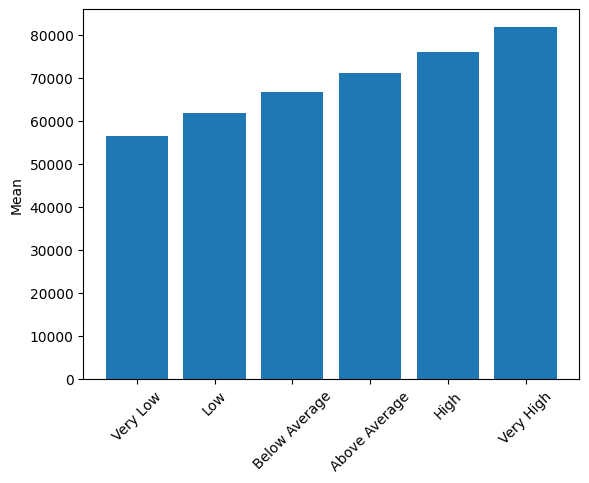

In [13]:
barc(eda,'Pricerange','Income')

Now we can see clearly that house with higher prices tend to be located in areas that have higher average income.

## 4.2 - House Age

The next feature is the age of the houses, based on our assumption the newly built houses would cost more than the older ones, we will see if this is true or not.

<AxesSubplot: xlabel='Age', ylabel='Price'>

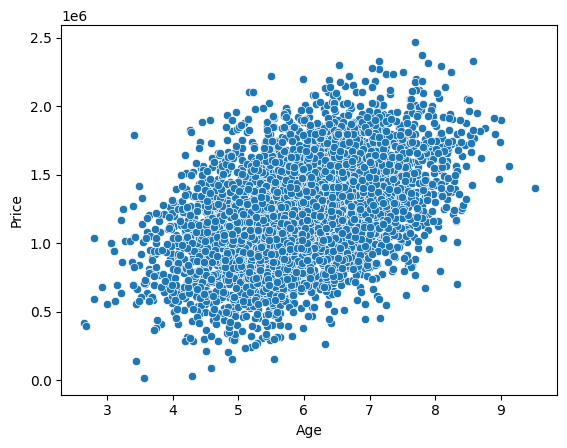

In [14]:
sns.scatterplot(data=df, x="Age", y="Price")

Based on this scatter plot our assumption is incorrect, but let's see the barchart based on the categories that we made before just to be sure.

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2747969679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot = df.groupby(x).mean().reset_index()


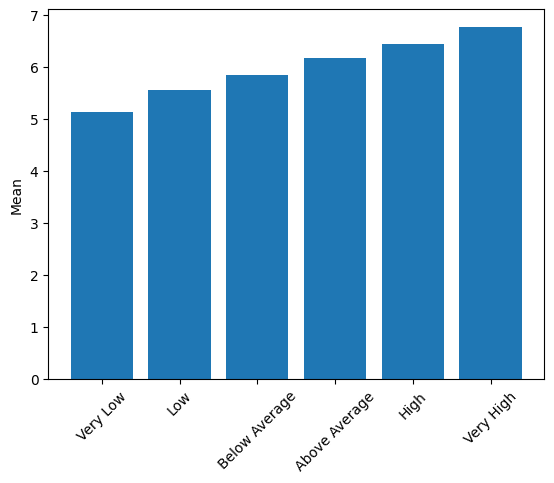

In [15]:
barc(eda,'Pricerange','Age')

We can see that houses with higher price is actually tend to be the older houses, maybe because the newly built houses are now smaller because there are not much land to built anymore.

## 4.3 - Number of Rooms

We got two types of features that have similar information, which is rooms and bedrooms, we will check the connection between this two feature first before checking them with our target.

<AxesSubplot: xlabel='Rooms', ylabel='Bedrooms'>

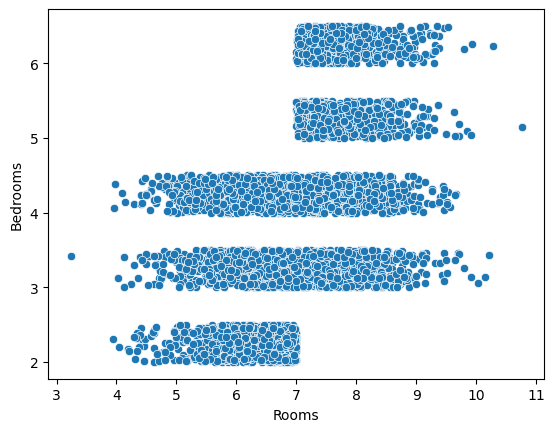

In [16]:
sns.scatterplot(data=df, x="Rooms", y="Bedrooms")

We can see some information like the houses with 5 or 6 bedrooms have minimum 7 rooms, or houses with 2 bedrooms have maximum 7 rooms, but we cannot say for sure that more bedrooms instantly meant more rooms in houses.

Now let's see these features connection with the house price.

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2747969679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot = df.groupby(x).mean().reset_index()


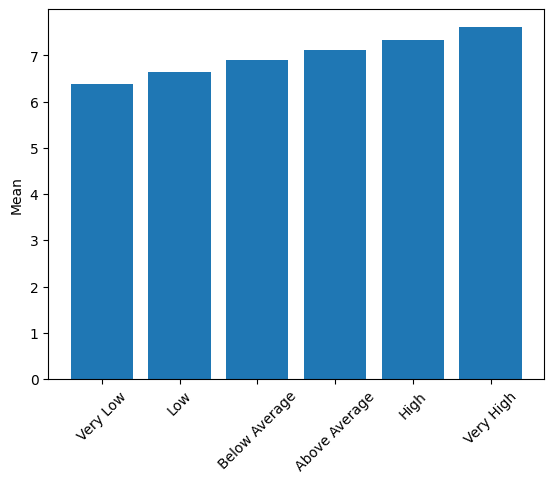

In [17]:
barc(eda,'Pricerange','Rooms')

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2747969679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot = df.groupby(x).mean().reset_index()


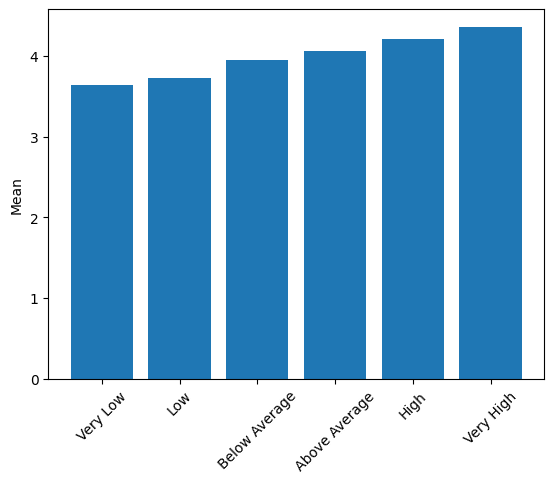

In [18]:
barc(eda,'Pricerange','Bedrooms')

We can see from the two charts that houses with higher price tend to have more rooms or bedrooms, but not that significantly because the range are very close between each price categories. This could be because the number of rooms doesn't really define the size of the house.

## 4.4 - Area Population

The last feature is the area population and we assume that the area with less population is more exclusive and therefore have higher prices on it's land and houses.

<AxesSubplot: xlabel='Population', ylabel='Price'>

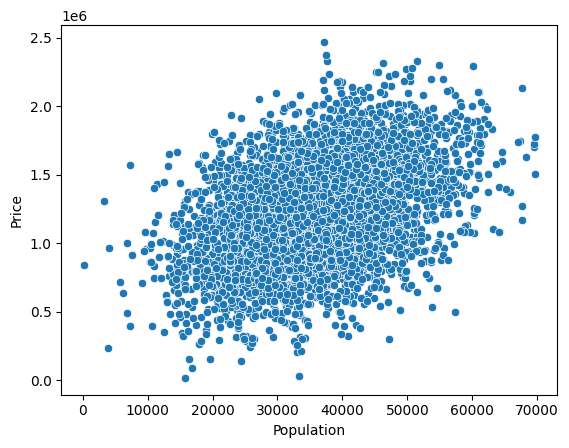

In [19]:
sns.scatterplot(data=df, x="Population", y="Price")

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2747969679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot = df.groupby(x).mean().reset_index()


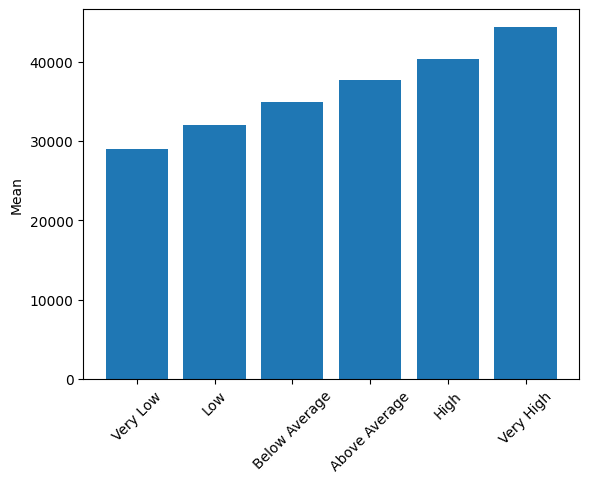

In [20]:
barc(eda,'Pricerange','Population')

We can see from the two charts that the more populated area tend to have houses with higher price, this could be because the more populated area is nearer to city center and therefore have higher prices.

## 4.5 - Connection Between Features

After looking for connections between features and our target, let's see some connection between features. The first one is to prove our assumption that people with higher income tend to have bigger houses therefore more rooms.

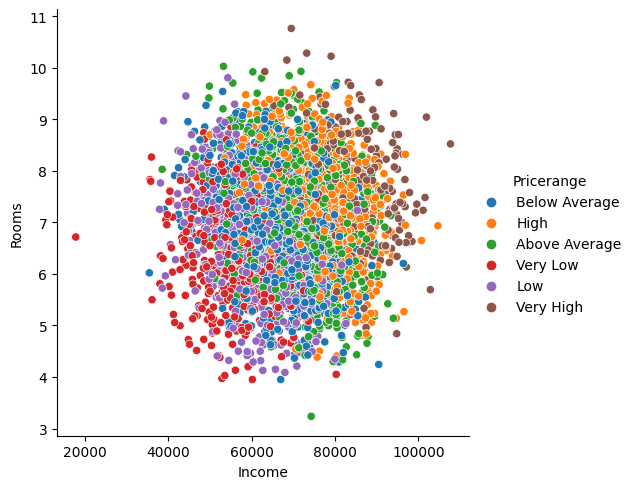

In [21]:
sns.relplot(data=eda, x="Income", y="Rooms", hue='Pricerange')

From this scatter plot we can't really see any indication that area with higher income tend to hav houses with more rooms.

From our previous exploration we found out that the area with more population have more expensive houses, and we assume that is because it is closer to city center, now we could further explore this by comparing the data with another feature which is area income.

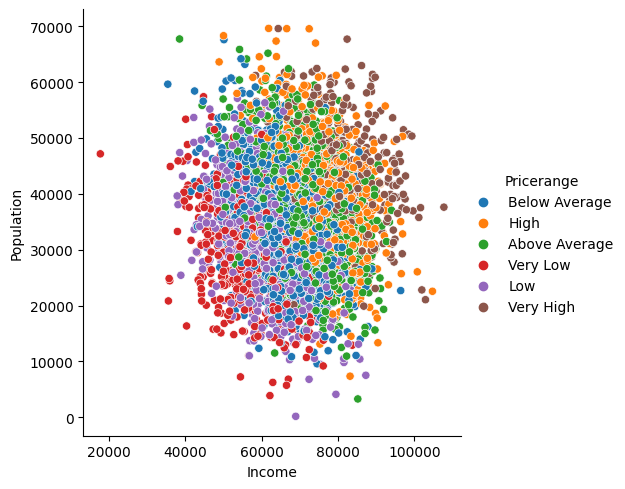

In [22]:
sns.relplot(data=eda, x="Income", y="Population", hue='Pricerange')

Same as before, the scatter plot shown a very mixed distribution between the two features, therefore we cannot assume that people in populated area tend to have more income.

Our early exploration also stated that the older houses tend to have higher prices and we assume that the newly built houses are smaller, let's try to explore this further by comparing the age and room features.

In [23]:
eda['Roomscat'] = 9
eda.loc[eda['Rooms'].between(8, 9), 'Roomscat'] = 8
eda.loc[eda['Rooms'].between(7, 8), 'Roomscat'] = 7
eda.loc[eda['Rooms'].between(6, 7), 'Roomscat'] = 6
eda.loc[eda['Rooms'].between(5, 6), 'Roomscat'] = 5
eda.loc[eda['Rooms'].between(4, 5), 'Roomscat'] = 4
eda.loc[eda['Rooms'].between(3, 4), 'Roomscat'] = 3
eda.loc[eda['Rooms']<3, 'Roomscat'] = 2

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2747969679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot = df.groupby(x).mean().reset_index()


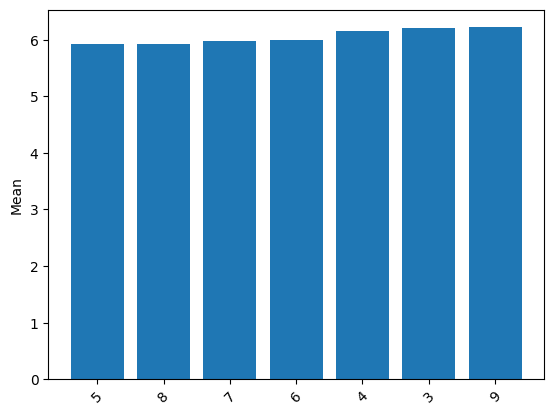

In [24]:
barc(eda,'Roomscat','Age')

We can see that all caregories have similar average, therefore we cannot assume that newly built houses is smaller or not.

# 5 - Data Preprocessing

## 5.1 - Get Data for Model Inference

The first thing to do in preprocessing is to split a little sample from our dataset to be our inference data.

In [25]:
# Get Data for Model Inference

data_inf = df.sample(10, random_state=1)
data_inf

,Income,Age,Rooms,Bedrooms,Population,Price,Address
2764,75012.341660,6.742828,6.604335,4.10,42877.424147,1.413580e+06,"6218 Parker Crescent\nSouth Kristaside, CA 14710"
4767,76187.273309,6.156222,7.166149,3.32,45084.394236,1.618721e+06,"207 Dillon Knolls\nPort Jesseburgh, FM 27308"
3814,67622.219611,5.813928,5.071112,4.16,35359.848465,8.413925e+05,USCGC Joseph\nFPO AA 84443
3499,66933.165273,4.748787,5.879803,2.09,41834.042941,8.814439e+05,"7485 Hurley Lights\nEast Brian, CA 67661"
2735,65192.105635,6.275509,8.017889,4.47,26228.394577,1.174748e+06,"2223 Andrew Branch Suite 214\nNew Willie, UT 9..."
3922,53562.403541,6.323328,4.027931,3.13,17964.469901,2.662989e+05,"441 Ryan Courts Suite 717\nGonzalesport, NV 30350"
2701,84226.166410,7.981054,7.934351,5.01,30167.233427,1.877942e+06,"725 Wood Flats\nLake Josephtown, MO 38832-8878"
1179,69289.180684,4.931634,6.364757,4.44,40695.797856,1.022409e+06,"16295 Wood Motorway Apt. 541\nSandraview, IA 9..."
932,70961.581312,8.598383,6.185951,2.02,38251.812169,1.766248e+06,"8749 Matthew Row\nEast Markport, IN 41253"
792,64290.205706,3.648546,7.368073,3.44,54157.295164,9.490722e+05,"519 Avila Road\nJamesbury, SC 76217-0455"


After we split the data we will remove those data from our dataset.

In [26]:
# Remove Inference-Set from Dataset

data_train_test = df.drop(data_inf.index)

# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

data_train_test


,Income,Age,Rooms,Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4985,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4986,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4987,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4988,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


## 5.2 - Splitting between Train-Set and Test-Set

Next we will split our data into train-set and test-set, we will use ratio of 80:20 to split them and also use stratify on our target to keep the split proportion equal between the target categories.

In [27]:
# Splitting between Train-Set and Test-Set
train, test= train_test_split(data_train_test, test_size=0.2, random_state=1)

print('Train Size : ', train.shape)
print('Test Size  : ', test.shape)

Train Size :  (3992, 7)
Test Size  :  (998, 7)


## 5.3 - Handling Missing Values

From our early exploration we didn't find any missing values, but we will do another check just to be sure.

In [28]:
train.isnull().sum(),test.isnull().sum()

(Income        0
 Age           0
 Rooms         0
 Bedrooms      0
 Population    0
 Price         0
 Address       0
 dtype: int64,
 Income        0
 Age           0
 Rooms         0
 Bedrooms      0
 Population    0
 Price         0
 Address       0
 dtype: int64)

## 5.4 - Handling Outlier

Now we will check our dataset to find any outliers, we will remove the Address feature first.

In [29]:
sel_train = train.drop(['Address'], axis=1)
sel_test = test.drop(['Address'], axis=1)

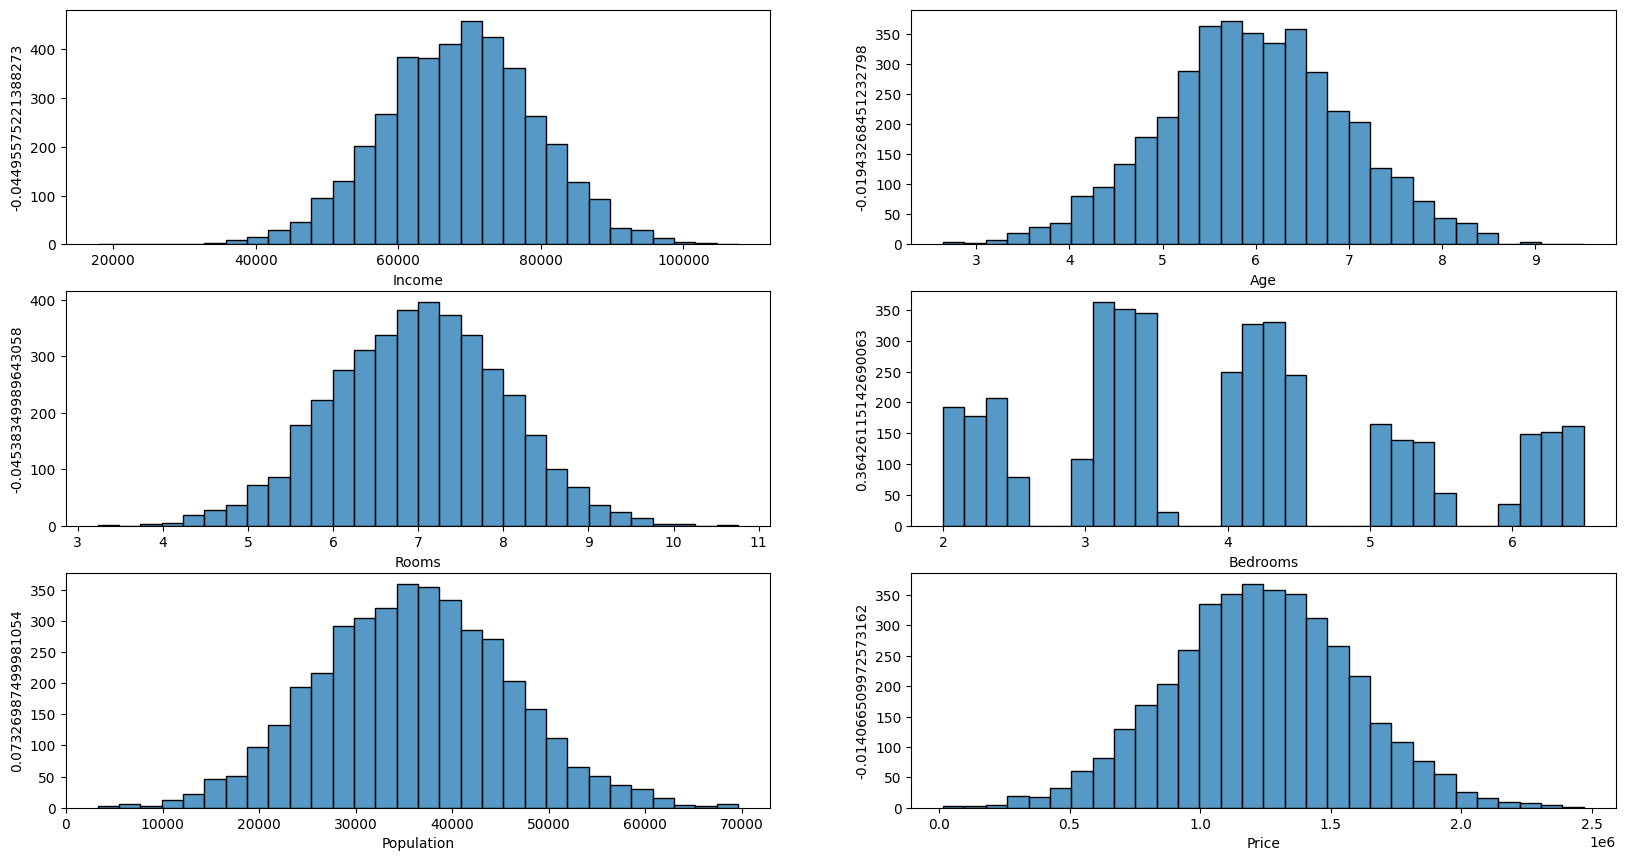

In [30]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in sel_train:
    if plotnumber<=14 :
        ax = plt.subplot(7,2,plotnumber)
        sns.histplot(sel_train[column], bins=30)
        plt.xlabel(column,fontsize=10)
        text = sel_train[column].skew()
        plt.ylabel(text,fontsize=10)
    plotnumber+=1
plt.show()

It seems that all of the features have a normal distribution, so we will check the outliers using zscore.

In [31]:
for column in sel_train.columns:
    tr = sel_train[column]
    ts = sel_test[column]
    
    minimum = tr.mean()-3*tr.std()
    maximum = tr.mean()+3*tr.std()
 
    outltr = ((tr < minimum) |(tr > maximum))
    outlts = ((ts < minimum) |(ts > maximum))
    sel_train[column].loc[outltr] = np.nan
    sel_test[column].loc[outlts] = np.nan
    
sel_train.isna().sum(), sel_test.isna().sum()

(Income        12
 Age            9
 Rooms          8
 Bedrooms       0
 Population    14
 Price         12
 dtype: int64,
 Income        1
 Age           1
 Rooms         1
 Bedrooms      0
 Population    3
 Price         1
 dtype: int64)

Then we will use KNNImputer so each missing values are imputed using the mean value from n_neighbors nearest neighbors found in the dataset.

In [32]:
imputer = KNNImputer()
imp_train = pd.DataFrame(imputer.fit_transform(sel_train), columns=sel_train.columns)
imp_test = pd.DataFrame(imputer.transform(sel_test), columns=sel_test.columns)
imp_train.isna().sum(), imp_test.isna().sum()

(Income        0
 Age           0
 Rooms         0
 Bedrooms      0
 Population    0
 Price         0
 dtype: int64,
 Income        0
 Age           0
 Rooms         0
 Bedrooms      0
 Population    0
 Price         0
 dtype: int64)

## 5.5 - Feature Selection

In [33]:
# Display X_train

imp_train

,Income,Age,Rooms,Bedrooms,Population,Price
0,79097.134002,5.873084,8.007305,5.09,43950.662380,1.770617e+06
1,50703.152916,6.096813,7.784818,4.49,26324.207865,7.433933e+05
2,84054.451854,6.136225,7.685137,5.38,23023.045047,1.619722e+06
3,60640.931881,5.165922,5.355114,2.32,43119.540656,8.090897e+05
4,61194.479591,3.711992,7.091024,4.07,28667.140510,3.694334e+05
...,...,...,...,...,...,...
3987,52866.901827,6.595790,5.767253,4.34,31925.899584,7.723102e+05
3988,75927.359047,5.853150,6.082841,4.19,22993.635443,1.143203e+06
3989,70472.792378,6.010154,6.110192,3.24,34894.158826,1.265181e+06
3990,65274.139949,6.764272,6.203729,2.05,25620.915694,1.399906e+06


Now we will do feature selection by using heatmpa to find whether the feature have any correlation with our target or not.

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2178954303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<AxesSubplot: >

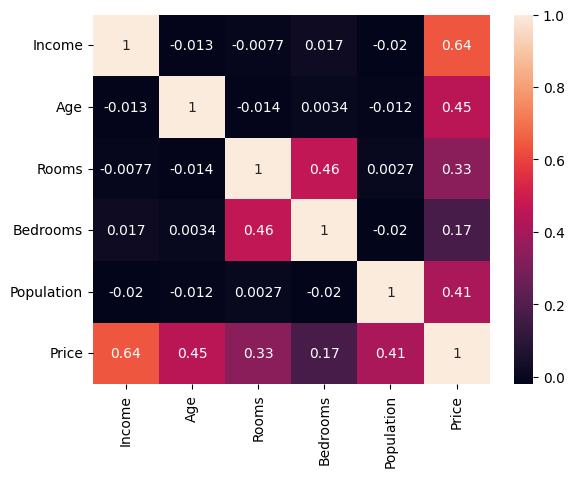

In [34]:
sns.heatmap(train.corr(),annot=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\3874805299.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(method='spearman'),annot=True)


<AxesSubplot: >

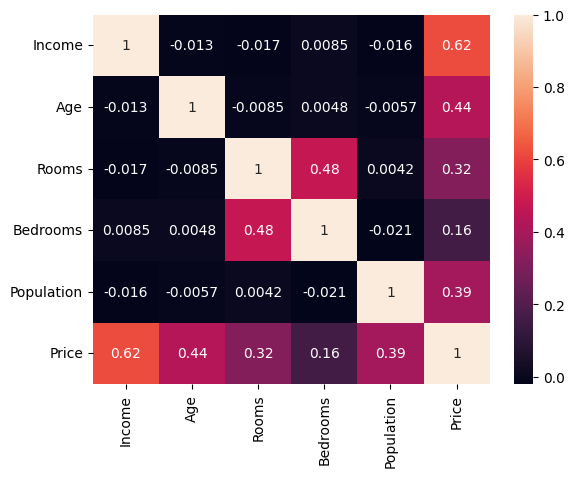

In [35]:
sns.heatmap(train.corr(method='spearman'),annot=True)

From the two heatmap we can see that only income have a decent correlation and bedrooms have the worst correlation, we will use all the features but bedrooms.

In [36]:
# Drop Column
train = imp_train.drop(['Bedrooms'], axis=1)
test = imp_test.drop(['Bedrooms'], axis=1)
train

,Income,Age,Rooms,Population,Price
0,79097.134002,5.873084,8.007305,43950.662380,1.770617e+06
1,50703.152916,6.096813,7.784818,26324.207865,7.433933e+05
2,84054.451854,6.136225,7.685137,23023.045047,1.619722e+06
3,60640.931881,5.165922,5.355114,43119.540656,8.090897e+05
4,61194.479591,3.711992,7.091024,28667.140510,3.694334e+05
...,...,...,...,...,...
3987,52866.901827,6.595790,5.767253,31925.899584,7.723102e+05
3988,75927.359047,5.853150,6.082841,22993.635443,1.143203e+06
3989,70472.792378,6.010154,6.110192,34894.158826,1.265181e+06
3990,65274.139949,6.764272,6.203729,25620.915694,1.399906e+06


## 5.6 - Splitting between Features and Target

After we select all our features, we will do splitting between those features and our target.

In [37]:
# Splitting between `X` and `y`

X_train = train.drop(['Price'], axis=1)
X_test = test.drop(['Price'], axis=1)
y_train = train['Price']
y_test = test['Price']
X_train

,Income,Age,Rooms,Population
0,79097.134002,5.873084,8.007305,43950.662380
1,50703.152916,6.096813,7.784818,26324.207865
2,84054.451854,6.136225,7.685137,23023.045047
3,60640.931881,5.165922,5.355114,43119.540656
4,61194.479591,3.711992,7.091024,28667.140510
...,...,...,...,...
3987,52866.901827,6.595790,5.767253,31925.899584
3988,75927.359047,5.853150,6.082841,22993.635443
3989,70472.792378,6.010154,6.110192,34894.158826
3990,65274.139949,6.764272,6.203729,25620.915694


## 5.7 - Feature Scaling

We will use standardscaler because all our feature have normal distribution.

In [38]:
# Feature Scaling using MinMaxScaler

scaler = StandardScaler()

## 5.8 - Pipeline

Now we will build a pipeline that represents our preprocessing.

In [39]:
pipe = Pipeline([
        ('scale', scaler)])
cols = ['Income','Age','Rooms','Population']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipe, cols)])
preprocessor.fit(X_train)
X_train_final = preprocessor.transform(X_train)
X_test_final = preprocessor.transform(X_test)
X_train_final

array([[ 0.99783754, -0.1034518 ,  1.01439715,  0.81501091],
       [-1.70787305,  0.12402032,  0.79094452, -1.00097643],
       [ 1.47022876,  0.16409115,  0.69083142, -1.34108282],
       ...,
       [ 0.1760094 ,  0.03591106, -0.8909499 , -0.1180466 ],
       [-0.319379  ,  0.80264481, -0.7970068 , -1.07343398],
       [-0.14950244, -0.76525615,  0.1669476 , -1.12352886]])

# 6 - Model Definition

We will use 5 models here, each one will be defined below:

In [40]:
linreg = LinearRegression()
ridreg = Ridge(random_state=1)
lasreg = Lasso(random_state=1)
elanet = ElasticNet(random_state=1)
sgdreg = SGDRegressor(random_state=1)

### A. Linear Regression

Simple linear regression is a regression technique in which the independent variable has a linear relationship with the dependent variable. The straight line in the diagram is the best fit line. The main goal of the simple linear regression is to consider the given data points and plot the best fit line to fit the model in the best way possible.

Pros:
- Simple method
- Good interpretation
- Easy to implement

Cons:
- Assumes linear relationship between dependent and independent variables, which is incorrect in most cases
- Sensitive to outliers
- If the number of observations are less, it leads to over fitting, it starts considering noise.

### B. Ridge Regression

Simple linear regression is a regression technique in which the independent variable has a linear relationship with the dependent variable. The straight line in the diagram is the best fit line. The main goal of the simple linear regression is to consider the given data points and plot the best fit line to fit the model in the best way possible.

Pros:
- Simple method
- Good interpretation
- Easy to implement

Cons:
- Assumes linear relationship between dependent and independent variables, which is incorrect in most cases
- Sensitive to outliers
- If the number of observations are less, it leads to over fitting, it starts considering noise.

### C. Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

Pros:
- Select features, by shrinking co-efficient towards zero.
- Avoids over fitting

Cons:
- Selected features will be highly biased.
- For n<<p (n-number of data points, p-number of features), LASSO selects at most n features.
- LASSO will select only one feature from a group of correlated features, the selection is arbitrary in nature.
- For different boot strapped data, the feature selected can be very different.
- Prediction performance is worse than Ridge regression.

### D. Elasticnet

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

Pros:
- Doesn’t have the problem of selecting more than n predictors when n<<p, whereas LASSO saturates when n<<p.

Cons:
- Computationally more expensive than LASSO or Ridge.

### E. SGD Regressor

Stochastic Gradient Descent sums the error of an individual observation and performs an update to the model on each observation — This is the same as setting the number of Mini Batches to be equal to m, where m is the number of observations.

Pros:
- Only a single observation is being processed by the network so it is easier to fit into memory
- May (likely) to reach near the minimum (and begin to oscillate) faster than Batch Gradient Descent on a large dataset
- The frequent updates create plenty of oscillations which can be helpful for getting out of local minimums.

Cons:
- Can veer off in the wrong direction due to frequent updates
- Lose the benefits of vectorization since we process one observation per time
- Frequent updates are computationally expensive due to using all resources for processing one training sample at a time

## Source

<a href="https://www.edureka.co/blog/linear-regression-for-machine-learning/#linear">Linear Regression</a>

<a href="https://www.mygreatlearning.com/blog/what-is-ridge-regression/#:~:text=Ridge%20regression%20is%20a%20model,away%20from%20the%20actual%20values.">Ridge Regression</a>

<a href="https://www.statisticshowto.com/lasso-regression/#:~:text=What%20is%20Lasso%20Regression%3F,i.e.%20models%20with%20fewer%20parameters).">Lasso Regression</a>

<a href="https://corporatefinanceinstitute.com/resources/data-science/elastic-net/">Elasticnet</a>

<a href="https://towardsdatascience.com/gradient-descent-811efcc9f1d5">Stochastic Gradient Descent</a>

<a href="https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f">Pros and Cons</a>

# 7 - Model Training

In [41]:
linreg.fit(X_train_final, y_train)

LinearRegression()

In [42]:
ridreg.fit(X_train_final, y_train)

Ridge(random_state=1)

In [43]:
lasreg.fit(X_train_final, y_train)

Lasso(random_state=1)

In [44]:
elanet.fit(X_train_final, y_train)

ElasticNet(random_state=1)

In [45]:
sgdreg.fit(X_train_final, y_train)

SGDRegressor(random_state=1)

# 8 - Model Evaluation

We will create prediction by using each models and do evaluation based on MAE, MSE, RMSE, and R2 square to compare them.

In [46]:
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    perc = (np.sqrt(metrics.mean_squared_error(true, predicted))) / true.mean() * 100
    r2_square = metrics.r2_score(true, predicted) * 100
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('Error percentage', perc)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    perc = (np.sqrt(metrics.mean_squared_error(true, predicted))) / true.mean() * 100
    r2_square = metrics.r2_score(true, predicted) * 100
    return mae, mse, rmse, perc, r2_square

## 8.1 - Linear Regression

In [47]:
# Predict Train-Set and Test-Set 

pred_train1 = linreg.predict(X_train_final)
pred_test1 = linreg.predict(X_test_final)

pred_train1

array([1676200.94434706,  823117.80352729, 1477449.08926864, ...,
       1151628.62689327, 1037289.04904543,  937504.74439811])

In [48]:
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train1)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test1)

Train set evaluation:
_____________________________________
MAE: 86982.33795968902
MSE: 14081113328.646618
RMSE: 118663.86698842498
Error percentage 9.637441651901336
R2 Square 88.29887652899994
__________________________________
Test set evaluation:
_____________________________________
MAE: 85144.06736281677
MSE: 13137899546.24214
RMSE: 114620.67678321456
Error percentage 9.279577879161236
R2 Square 89.63065672311298
__________________________________


We can see that that the model have 88,30% accuracy for train-set and 89,63% for test-set which indicated that this model is quite a good fit. Based on the RMSE we can see that the error is around 118.664 USD or 9,64% for trainset, and 114.621 USD or 9,28% for test-set which could be much better.

In [49]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, pred_test1)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])

## 8.2 - Ridge Regression

The next model is ridge regression, we will do the same method to analyze it.

In [50]:
pred_train2 = ridreg.predict(X_train_final)
pred_test2 = ridreg.predict(X_test_final)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train2)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test2)

Train set evaluation:
_____________________________________
MAE: 86985.94101634667
MSE: 14081120400.828056
RMSE: 118663.89678764158
Error percentage 9.63744407208381
R2 Square 88.29887065215864
__________________________________
Test set evaluation:
_____________________________________
MAE: 85148.47081724794
MSE: 13138596710.387728
RMSE: 114623.71792254745
Error percentage 9.279824086827016
R2 Square 89.63010647272323
__________________________________


We can see that that the model have 88,30% accuracy for train-set and 89,63% for test-set which indicated that this model is quite a good fit. Based on the RMSE we can see that the error is around 118.664 USD or 9,64% for trainset, and 114.624 USD or 9,28% for test-set which could be much better.

In [51]:
results_df2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, pred_test2)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])
results_df = results_df.append(results_df2, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\3008320969.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2, ignore_index=True)


## 8.3 - Ridge Regression Improvement

We will try to improve the model by doing some hyperparameter tuning and try to finde the best parameter combination by using randomizedsearch.

In [52]:
# define search space
space = dict()
space['alpha'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = RandomizedSearchCV(ridreg, space, n_iter=100, scoring='r2', n_jobs=-1, random_state=1)
# execute search
result = search.fit(X_train_final, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8813377461081547
Best Hyperparameters: {'solver': 'sag', 'normalize': False, 'fit_intercept': True, 'alpha': 1}


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Now we will use the recommended hyperparameter to predict our train and test sets.

In [53]:
ridreg2 = result.best_estimator_

y_pred_train3 = ridreg2.predict(X_train_final)
y_pred_test3 = ridreg2.predict(X_test_final)

y_pred_train3

array([1676117.49160496,  823149.86565324, 1477325.46982704, ...,
       1151658.71143287, 1037302.67967596,  937518.53756194])

In [54]:
pred_train3 = ridreg2.predict(X_train_final)
pred_test3 = ridreg2.predict(X_test_final)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train3)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test3)

Train set evaluation:
_____________________________________
MAE: 86984.67505853166
MSE: 14081118972.26036
RMSE: 118663.89076825503
Error percentage 9.637443583211432
R2 Square 88.29887183926982
__________________________________
Test set evaluation:
_____________________________________
MAE: 85147.6644353972
MSE: 13138516349.140886
RMSE: 114623.36737830068
Error percentage 9.279795707107672
R2 Square 89.63016989940354
__________________________________


We can see that that there are no improvement for the accuracy of the model or the error percentage.

In [55]:
results_df3 = pd.DataFrame(data=[["Ridge Regression 2", *evaluate(y_test, pred_test3)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])
results_df = results_df.append(results_df3, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\626129844.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df3, ignore_index=True)


## 8.4 - Lasso Regression

The next model is lasso regression, we will do the same method to analyze it.

In [56]:
pred_train4 = lasreg.predict(X_train_final)
pred_test4 = lasreg.predict(X_test_final)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train4)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test4)

Train set evaluation:
_____________________________________
MAE: 86982.42058374472
MSE: 14081113332.770851
RMSE: 118663.8670058028
Error percentage 9.637441653312697
R2 Square 88.29887652557278
__________________________________
Test set evaluation:
_____________________________________
MAE: 85144.17659615778
MSE: 13137920659.025496
RMSE: 114620.76888167125
Error percentage 9.279585335362205
R2 Square 89.63064005943723
__________________________________


We can see that that the model have 88,30% accuracy for train-set and 89,63% for test-set which indicated that this model is quite a good fit. Based on the RMSE we can see that the error is around 118.664 USD or 9,64% for trainset, and 114.621 USD or 9,28% for test-set which could be much better.

In [57]:
results_df4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, pred_test4)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])
results_df = results_df.append(results_df4, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\692856709.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df4, ignore_index=True)


## 8.5 - Lasso Regression Improvement

We will try to improve the model by doing some hyperparameter tuning and try to finde the best parameter combination by using randomizedsearch.

In [58]:
# define search space
space2 = dict()
space2['alpha'] = [1, 0.1, 0.01, 0.001, 0.0001]
space2['fit_intercept'] = [True, False]
space2['normalize'] = [True, False]
# define search
search2 = RandomizedSearchCV(lasreg, space2, n_iter=20, scoring='r2', n_jobs=-1, random_state=1)
# execute search
result2 = search2.fit(X_train_final, y_train)
# summarize result
print('Best Score: %s' % result2.best_score_)
print('Best Hyperparameters: %s' % result2.best_params_)

Best Score: 0.8813277435490112
Best Hyperparameters: {'normalize': True, 'fit_intercept': True, 'alpha': 1}


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Now we will use the recommended hyperparameter to predict our train and test sets.

In [59]:
lasreg2 = result.best_estimator_

y_pred_train5 = lasreg2.predict(X_train_final)
y_pred_test5 = lasreg2.predict(X_test_final)

y_pred_train5

array([1676117.49160496,  823149.86565324, 1477325.46982704, ...,
       1151658.71143287, 1037302.67967596,  937518.53756194])

In [60]:
pred_train5 = ridreg2.predict(X_train_final)
pred_test5 = ridreg2.predict(X_test_final)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train5)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test5)

Train set evaluation:
_____________________________________
MAE: 86984.67505853166
MSE: 14081118972.26036
RMSE: 118663.89076825503
Error percentage 9.637443583211432
R2 Square 88.29887183926982
__________________________________
Test set evaluation:
_____________________________________
MAE: 85147.6644353972
MSE: 13138516349.140886
RMSE: 114623.36737830068
Error percentage 9.279795707107672
R2 Square 89.63016989940354
__________________________________


We can see that that there are no improvement for the accuracy of the model, and the error seems to get slightly worst than the original.

In [61]:
results_df5 = pd.DataFrame(data=[["Lasso Regression 2", *evaluate(y_test, pred_test5)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])
results_df = results_df.append(results_df5, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\81273792.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df5, ignore_index=True)


## 8.6 - Elasticnet

The next model is elasticnet, we will do the same method to analyze it.

In [62]:
pred_train6 = elanet.predict(X_train_final)
pred_test6 = elanet.predict(X_test_final)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train6)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test6)

Train set evaluation:
_____________________________________
MAE: 127358.4335614053
MSE: 26361174384.186615
RMSE: 162361.2465589822
Error percentage 13.186381667426952
R2 Square 78.09439146531048
__________________________________
Test set evaluation:
_____________________________________
MAE: 128856.72061606268
MSE: 26861430898.871212
RMSE: 163894.57251193895
Error percentage 13.268744281390402
R2 Square 78.79909212896628
__________________________________


We can see that that the model have 78,09% accuracy for train-set and 78,80% for test-set which indicated that this model is not quite a good fit. Based on the RMSE we can see that the error is around 162.361 USD or 13,19% for trainset, and 163.894 USD or 13,27% for test-set which make this model the worst performing one so far.

In [63]:
results_df6 = pd.DataFrame(data=[["Elasticnet", *evaluate(y_test, pred_test6)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])
results_df = results_df.append(results_df6, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\3384014496.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df6, ignore_index=True)


## 8.7 - Elasticnet Improvement

We will try to improve the model by doing some hyperparameter tuning and try to finde the best parameter combination by using randomizedsearch.

In [64]:
# define search space
space3 = dict()
space3['alpha'] = [1, 0.1, 0.01, 0.001, 0.0001]
space3['l1_ratio'] = [1, 0.5, 0.1, 0.05, 0.01]
# define search
search3 = RandomizedSearchCV(elanet, space3, n_iter=25, scoring='r2', n_jobs=-1, random_state=1)
# execute search
result3 = search3.fit(X_train_final, y_train)
# summarize result
print('Best Score: %s' % result3.best_score_)
print('Best Hyperparameters: %s' % result3.best_params_)

Best Score: 0.8813283216473307
Best Hyperparameters: {'l1_ratio': 0.05, 'alpha': 0.001}


Now we will use the recommended hyperparameter to predict our train and test sets.

In [65]:
elanet2 = result.best_estimator_

y_pred_train7 = elanet2.predict(X_train_final)
y_pred_test7 = elanet2.predict(X_test_final)

y_pred_train7

array([1676117.49160496,  823149.86565324, 1477325.46982704, ...,
       1151658.71143287, 1037302.67967596,  937518.53756194])

In [66]:
pred_train7 = elanet2.predict(X_train_final)
pred_test7 = elanet2.predict(X_test_final)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train7)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test7)

Train set evaluation:
_____________________________________
MAE: 86984.67505853166
MSE: 14081118972.26036
RMSE: 118663.89076825503
Error percentage 9.637443583211432
R2 Square 88.29887183926982
__________________________________
Test set evaluation:
_____________________________________
MAE: 85147.6644353972
MSE: 13138516349.140886
RMSE: 114623.36737830068
Error percentage 9.279795707107672
R2 Square 89.63016989940354
__________________________________


We can see that that there is huge improvement from the original model, the accuracy went up to 88,30% for the train-set and 89,63% for the test-set, the error went down to 118.664 USD or 9,637% for the train-set and 114.623 USD or 9,28% for the test-set.

In [67]:
results_df7 = pd.DataFrame(data=[["Elasticnet 2", *evaluate(y_test, pred_test7)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])
results_df = results_df.append(results_df7, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\926884489.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df7, ignore_index=True)


## 8.8 - SGD Regressor

The last model is SGD Regressor, we will do the same method to analyze it.

In [68]:
pred_train8 = sgdreg.predict(X_train_final)
pred_test8 = sgdreg.predict(X_test_final)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train8)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test8)

Train set evaluation:
_____________________________________
MAE: 87020.19948149896
MSE: 14097983423.547947
RMSE: 118734.92924808583
Error percentage 9.643213066557832
R2 Square 88.28485781763807
__________________________________
Test set evaluation:
_____________________________________
MAE: 85264.40860956573
MSE: 13161691759.415146
RMSE: 114724.41657910118
Error percentage 9.287976551565857
R2 Square 89.6118782551517
__________________________________


We can see that that the model have 88,29% accuracy for train-set and 89,61% for test-set which indicated that this model is quite a good fit. Based on the RMSE we can see that the error is around 118.735 USD or 9,64% for trainset, and 114.724 USD or 9,29% for test-set.

In [69]:
results_df8 = pd.DataFrame(data=[["SGD Regressor", *evaluate(y_test, pred_test8)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])
results_df = results_df.append(results_df8, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2543932680.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df8, ignore_index=True)


## 8.9 - SGD Regressor Improvement

We will try to improve the model by doing some hyperparameter tuning and try to find the best parameter combination by using randomizedsearch.

In [70]:
# define search space
space4 = dict()
space4['loss'] = ['squared_error', 'huber', 'epsilon_insensitive']
space4['penalty'] = ['l1', 'l2', 'elasticnet']
space4['alpha'] = [1, 0.1, 0.01, 0.001, 0.0001]
# define search
search3 = RandomizedSearchCV(sgdreg, space4, n_iter=25, scoring='r2', n_jobs=-1, random_state=1)
# execute search
result3 = search3.fit(X_train_final, y_train)
# summarize result
print('Best Score: %s' % result3.best_score_)
print('Best Hyperparameters: %s' % result3.best_params_)

Best Score: 0.8813466690108104
Best Hyperparameters: {'penalty': 'elasticnet', 'loss': 'squared_error', 'alpha': 0.001}


Now we will use the recommended hyperparameter to predict our train and test sets.

In [71]:
sgdreg2 = result.best_estimator_

y_pred_train9 = sgdreg2.predict(X_train_final)
y_pred_test9 = sgdreg2.predict(X_test_final)

y_pred_train9

array([1676117.49160496,  823149.86565324, 1477325.46982704, ...,
       1151658.71143287, 1037302.67967596,  937518.53756194])

In [72]:
pred_train9 = sgdreg2.predict(X_train_final)
pred_test9 = sgdreg2.predict(X_test_final)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, pred_train9)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred_test9)

Train set evaluation:
_____________________________________
MAE: 86984.67505853166
MSE: 14081118972.26036
RMSE: 118663.89076825503
Error percentage 9.637443583211432
R2 Square 88.29887183926982
__________________________________
Test set evaluation:
_____________________________________
MAE: 85147.6644353972
MSE: 13138516349.140886
RMSE: 114623.36737830068
Error percentage 9.279795707107672
R2 Square 89.63016989940354
__________________________________


We can see that that there are slight improvement in accuracy for the train and test-set, the same thing also applied to the error rate based on the RMSE score.

In [73]:
results_df9 = pd.DataFrame(data=[["Lasso Regression 2", *evaluate(y_test, pred_test9)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'Error percentage', 'R2 Square'])
results_df = results_df.append(results_df9, ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27280\2849895485.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df9, ignore_index=True)


## 8.10 - Model Selection

Now we will recap all the model performance on their respective test-set predictions.

In [74]:
results_df

,Model,MAE,MSE,RMSE,Error percentage,R2 Square
0,Linear Regression,85144.067363,1.313790e+10,114620.676783,9.279578,89.630657
1,Ridge Regression,85148.470817,1.313860e+10,114623.717923,9.279824,89.630106
2,Ridge Regression 2,85147.664435,1.313852e+10,114623.367378,9.279796,89.630170
3,Lasso Regression,85144.176596,1.313792e+10,114620.768882,9.279585,89.630640
4,Lasso Regression 2,85147.664435,1.313852e+10,114623.367378,9.279796,89.630170
5,Elasticnet,128856.720616,2.686143e+10,163894.572512,13.268744,78.799092
6,Elasticnet 2,85147.664435,1.313852e+10,114623.367378,9.279796,89.630170
7,SGD Regressor,85264.408610,1.316169e+10,114724.416579,9.287977,89.611878
8,Lasso Regression 2,85147.664435,1.313852e+10,114623.367378,9.279796,89.630170


We can see that the original Linear Regression model have the best R2 square score and the least error percentage which is based on the RMSE score, so we will select this model for our inference.

# 9 - Model Saving

In [75]:
# Save the Files

with open('model.pkl', 'wb') as file_1:
  joblib.dump(linreg, file_1)

with open('pipeline.pkl', 'wb') as file_2:
  joblib.dump(preprocessor, file_2)

# 10 - Model Inference

Now we will use our preferred model to predict a new dataset which is our inference data that we already split from the start, first we will load the model from the saved files.

In [76]:
# Load All Files

with open('model.pkl', 'rb') as file_1:
  model = joblib.load(file_1)

with open('pipeline.pkl', 'rb') as file_2:
  preprocessor = joblib.load(file_2)

Let's take a look of our inference data.

In [77]:
# Display Inference Set

data_inf

,Income,Age,Rooms,Bedrooms,Population,Price,Address
0,75012.341660,6.742828,6.604335,4.10,42877.424147,1.413580e+06,"6218 Parker Crescent\nSouth Kristaside, CA 14710"
1,76187.273309,6.156222,7.166149,3.32,45084.394236,1.618721e+06,"207 Dillon Knolls\nPort Jesseburgh, FM 27308"
2,67622.219611,5.813928,5.071112,4.16,35359.848465,8.413925e+05,USCGC Joseph\nFPO AA 84443
3,66933.165273,4.748787,5.879803,2.09,41834.042941,8.814439e+05,"7485 Hurley Lights\nEast Brian, CA 67661"
4,65192.105635,6.275509,8.017889,4.47,26228.394577,1.174748e+06,"2223 Andrew Branch Suite 214\nNew Willie, UT 9..."
5,53562.403541,6.323328,4.027931,3.13,17964.469901,2.662989e+05,"441 Ryan Courts Suite 717\nGonzalesport, NV 30350"
6,84226.166410,7.981054,7.934351,5.01,30167.233427,1.877942e+06,"725 Wood Flats\nLake Josephtown, MO 38832-8878"
7,69289.180684,4.931634,6.364757,4.44,40695.797856,1.022409e+06,"16295 Wood Motorway Apt. 541\nSandraview, IA 9..."
8,70961.581312,8.598383,6.185951,2.02,38251.812169,1.766248e+06,"8749 Matthew Row\nEast Markport, IN 41253"
9,64290.205706,3.648546,7.368073,3.44,54157.295164,9.490722e+05,"519 Avila Road\nJamesbury, SC 76217-0455"


Now we will transform the data using the pipeline we already built.

In [78]:
X_inf = preprocessor.transform(data_inf)
X_inf

array([[ 0.60859075,  0.78084238, -0.39466192,  0.70443921],
       [ 0.72055198,  0.18442265,  0.16959054,  0.93181504],
       [-0.09562651, -0.16359745, -1.93453957, -0.07006835],
       [-0.16128766, -1.24655724, -1.12233811,  0.59694357],
       [-0.32719619,  0.30570526,  1.02502743, -1.01084771],
       [-1.43541021,  0.35432428, -2.98224836, -1.8622488 ],
       [ 1.48659173,  2.03978246,  0.94112683, -0.60504395],
       [ 0.06322104, -1.0606505 , -0.63528004,  0.47967445],
       [ 0.22258693,  2.66743842, -0.81486207,  0.2278798 ],
       [-0.41313976, -2.36520395,  0.37239095,  1.86656191]])

After preprocessing complete we can run our model to predict the results.

In [79]:
# Predict using Linear regression

y_pred_inf = model.predict(X_inf)
y_pred_inf

array([1542635.65359234, 1574225.40865085,  940263.63121389,
        948180.75575704, 1186476.04097844,  341208.24389545,
       1911798.4617757 , 1069726.98459336, 1635195.85286427,
       1077330.33355973])

And finally we can add the results to our inference dataset.

In [80]:
data_inf['Price - Prediction'] = y_pred_inf
data_inf

,Income,Age,Rooms,Bedrooms,Population,Price,Address,Price - Prediction
0,75012.341660,6.742828,6.604335,4.10,42877.424147,1.413580e+06,"6218 Parker Crescent\nSouth Kristaside, CA 14710",1.542636e+06
1,76187.273309,6.156222,7.166149,3.32,45084.394236,1.618721e+06,"207 Dillon Knolls\nPort Jesseburgh, FM 27308",1.574225e+06
2,67622.219611,5.813928,5.071112,4.16,35359.848465,8.413925e+05,USCGC Joseph\nFPO AA 84443,9.402636e+05
3,66933.165273,4.748787,5.879803,2.09,41834.042941,8.814439e+05,"7485 Hurley Lights\nEast Brian, CA 67661",9.481808e+05
4,65192.105635,6.275509,8.017889,4.47,26228.394577,1.174748e+06,"2223 Andrew Branch Suite 214\nNew Willie, UT 9...",1.186476e+06
5,53562.403541,6.323328,4.027931,3.13,17964.469901,2.662989e+05,"441 Ryan Courts Suite 717\nGonzalesport, NV 30350",3.412082e+05
6,84226.166410,7.981054,7.934351,5.01,30167.233427,1.877942e+06,"725 Wood Flats\nLake Josephtown, MO 38832-8878",1.911798e+06
7,69289.180684,4.931634,6.364757,4.44,40695.797856,1.022409e+06,"16295 Wood Motorway Apt. 541\nSandraview, IA 9...",1.069727e+06
8,70961.581312,8.598383,6.185951,2.02,38251.812169,1.766248e+06,"8749 Matthew Row\nEast Markport, IN 41253",1.635196e+06
9,64290.205706,3.648546,7.368073,3.44,54157.295164,9.490722e+05,"519 Avila Road\nJamesbury, SC 76217-0455",1.077330e+06


# 11 - Conclusion

## 11.1 - Model Analysis

- The goal of the model is to predict house price based on area characteristics.
- From 5 basic and 4 improved model, we determined that the linear regression model is the best performing one.
- Based on r2 square score this model have 88,30% accuracy for train-set and 89,63% for test-set which indicated that this model is quite a good fit.
- Based on the RMSE, the error of the model is around 118.664 USD or 9,64% for train-set, and 114.621 USD or 9,28% for test-set which could be improved to be better.
- Model improvement was done to other model by doing randomizedsearch by tuning some hyperparameters, but the linear regression doesn't really have any integral parameter that can be tuned.
- The model could be improved by adding or removing some features.
- It is very reccommended to try to improve the other models with other parameter or feature.

## 11.2 - Overall Analysis

- Based on EDA, we gather some informations such as:
1. House price tend to rise on area with higher income.
2. Houses with higher price is actually tend to be the older houses, maybe because the newly built houses are now smaller because there are not much land to built anymore.
3. Newly built houses doesn't necessary have fewer rooms than the older houses, therefore we cannot assume that newly built houses is smaller or not.
4. There are some information like the houses with 5 or 6 bedrooms have minimum 7 rooms, or houses with 2 bedrooms have maximum 7 rooms, but we cannot say for sure that more bedrooms instantly meant more rooms in houses.
5. Houses with higher price tend to have more rooms or bedrooms, but not that significantly because the range are very close between each price categories. This could be because the number of rooms doesn't really define the size of the house.
6. The more populated area tend to have houses with higher price, this could be because the more populated area is nearer to city center and therefore have higher prices.
7. A very mixed distribution between the income and population meant we cannot assume that people in populated area tend to have more income.

- From preprocessing, we gather some information such as:
1. There are many outliers being handled and no missing values either in this dataset.
2. The feature with strong correlation are only income while bedrooms have weak correlation.
3. The numerical data was transformed using standardscaler because all the features have normal distribution.